# <center> <b> LECTURE 08 Linear Model Development
<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Content

    1. Linear Regression
    2. Multiple Linear Regression
    3. Polynomial Regression
    4. Model Evaluation using Visualization

<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


Some questions we want to ask in this module
<ul>
    <li>do I know if the dealer is offering fair value for my trade-in?</li>
    <li>do I know if I put a fair value on my car?</li>
</ul>
<p> In Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>
<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

### Import libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset that was cleaned in the previous lab.

In [15]:
# path of data 
path = '...'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


# 1. Linear Regression

<b>Simple Linear Regression </b> is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable ~ X</li>
    <li>The response/dependent variable that we want to predict ~ Y</li>
</ul>

<p>The result of Linear Regression is a <b>linear function f</b> that predicts the response variable as a function of the predictor variable.</p>

<b>Simple linear function:</b> $ Y = f(X) = a + b*X $
<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

#### Lets load the modules for linear regression

In [7]:
from sklearn.linear_model import LinearRegression

#### Create the linear regression object

In [47]:
simple_lm = LinearRegression()
simple_lm # khởi tạo mô hình

LinearRegression()

#### How could Highway-mpg help us predict car price ?

For example, we want to look at how highway-L/100km can help us predict car price.<br>
Using simple linear regression, we will create a linear function with "highway-L/100km" as the predictor variable and the "price" as the response variable.

In [48]:
X_lm = df[['highway-L/100km']] 
Y = df['price']

Fit the linear model ```.fit()``` using highway-L/100km.

In [ ]:
## sử dungh cột highway để dự báo cột giá ->> tìm a và b

In [49]:
simple_lm.fit(X_lm, Y) 

LinearRegression()

We can output a prediction with ```.predict()```

In [50]:
predicted_value = simple_lm.predict(X_lm)
predicted_value[:5] ## cái này dự đoán

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [ ]:
df['price'][:5] ##giá trị thật -> mô hình không hiệu quả lắm do sai số khá lớn

<h4>What is the value of the intercept (a)?</h4>


In [51]:
simple_lm.intercept_

-14617.843054664598

<h4>What is the value of the Slope (b)?</h4>


In [52]:
simple_lm.coef_

array([3458.68511314])

### What is the final estimated linear model we get ?

As we saw above, we should get a final linear model with the structure: $ Y = a + b*X $.<br>
Plugging in the actual values we get:

<center><b>price</b> = -14617.84 + 3458.68 x  <b>highway-L/100km</b>

<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise </h1>
    <b>How could 'engine-size' help us predict car price ? </b>
    <p>Train the model using 'engine-size' as the predictor variable and 'price' as the target variable</p>
</div>

In [ ]:
# Start here
# engine-size để dự đoán giá ô tô
# khởi tạo model
engine_size_price_model = LinearRegression()
# tạo biến X, Y
X_engine_size = df[['engine_size']] 
y = df['price']
#fit
engine_size_price_model.fit(X_engine_size, Y) 
# predict với 5 quan sát đầu
engine_size_price_model.predict(X_engine_size[:5])


In [ ]:
y[:5] --> lay ra de so sanh xem mo hinh du doan co tot khong

<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise </h1>
    <b>What is the equation of the predicted line ?</b>
</div>

The equation is : <b>price</b> = ... 

In [ ]:
# price = a + b * engine_size
a= engine_size_price_model.intercept_
b= engine_size_price_model.coef_
print(a,b)

# 2. Multiple Linear Regression

<p>What if we want to predict car price using more than one predictor variable ? -> The answer is Multiple Linear Regression </p>

<b>Multiple Linear Regression</b> is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors.

We will illustrate the structure by using four predictor variables, but these results can generalize to any integer.</p>
The equation is given by: $$ Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$
- $ a $: intercept
- $ b_1, b_2, b_3, b_4 $: coefficients of $ X_1, X_2, X_3, X_4 $

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-L/100km</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [53]:
X_4_feats = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']] # lọc ra 4 cột quan tâm

Fit the linear model using the four above-mentioned variables.


In [54]:
simple_lm.fit(X_4_feats, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [55]:
simple_lm.intercept_

-14385.634549360118

What are the values of the coefficients (b1, b2, b3, b4)?


In [56]:
simple_lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

#### What is the final estimated linear model that we get?

The linear function we get in this example: 

<b>price</b> = ___ + ___ x <b>horsepower</b> + ___ x <b>curb-weight</b> + ___ x <b>engine-size</b> + ___ x <b>highway-mpg</b>

<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise </h1>
    <b>Create and train a Multiple Linear Regression model named "multiple_lm" where the response variable is 'price', and the predictor variable is 'normalized-losses' and  'highway-L/100km'.</b>
</div>

In [ ]:
# Start here


<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise</h1>
    <b>Find the coefficient of the model ?</b>
</div>

In [2]:
# Start here


# 3. Polynomial Regression

<b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.<br>
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
<p>There are different orders of polynomial regression:</p>

- <b>Quadratic - 2nd order</b>: $ Y = a + b_1 X + b_2 X^2 $
- <b>Cubic - 3rd order</b>: $ Y = a + b_1 X + b_2 X^2 + b_3 X^3$
- <b>Higher order</b>: $ Y = a + b_1 X + b_2 X^2 + b_3 X^3 + ... $

The analytical expression for Multivariate Polynomial function gets more complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</br>
$$Y = a + b_1*X_1 + b_2*X_2 + b_3*X_1*X_2 + b_4*X_1^2 + b _5*X_2^2$$

## 3.1 Build model

<p>We saw earlier that the multivariate linear model had a quite good fit while using four features 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [59]:
print(X_4_feats)

     horsepower  curb-weight  engine-size  highway-L/100km
0           111         2548          130         8.703704
1           111         2548          130         8.703704
2           154         2823          152         9.038462
3           102         2337          109         7.833333
4           115         2824          136        10.681818
..          ...          ...          ...              ...
196         114         2952          141         8.392857
197         160         3049          141         9.400000
198         134         3012          173        10.217391
199         106         3217          145         8.703704
200         114         3062          141         9.400000

[201 rows x 4 columns]


We'll perform a polynomial transform on multiple features using ```PolynomialFeatures``` in sklearn module. First, we import the module:

In [30]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2 and fit to our dataframe X

In [35]:
poly_feat = PolynomialFeatures(degree=2) ## tạo biến mới là bình phương của biến cũ, đến khi nào đủ thì thôi -> bậc mấy thì tùy khai báo
X_pr = poly_feat.fit_transform(X_4_feats)

In [36]:
print(f"Before: {X_4_feats.shape} --- After : {X_pr.shape}")

Before: (201, 4) --- After : (201, 15)


<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise</h1>
    <b> Create a linear regression model (poly_lm), then perform fitting using the transformed data</b>
</div>

In [ ]:
# Với dữ liệu mới (đa thức bậc 2 trên 4 cột horsepower,...) xây dụng mô hình LinerRegression
poly_lm = LinerRegression()
y = df['price']
poly_lm.fit[X_pr, y]

In [ ]:
# Start here
print['Predict: ', poly_lm.predict(X_pr)[:5].tolist())
print('True: ', y[:5].values) 
# tìm ra bậc vừa đủ thì mô hình tốt dự đoán đúng và chỉ có cách thử

In [ ]:
# Xây dựng mô hình LR cho 3 cột height, width, length
three_feats_lm = LinearRegression()
three_feats_X = df[['height', 'width', 'length']]
y = df['price']
three_feats_lm.fit(three_feats_X, y)
print('Predict: ', three_feats_lm.predict(three_feats_X)[:5].tolist())
print('True: ', y[:-5].values)

In [ ]:
## Xây dựng mô hình LR cho 3 cột height, width, length kết hợp với Polynomial (degree = 2)
three_feats_poly_lm = LinearRegression()
poly_feat = PolynomialFeatures(degree=2)
three_feats_X = df[['height', 'width', 'length']]
three_feats_poly_X = poly_feat.fit.transfrom(three_feats_X)
y = df['price']
three_feats_poly_lm.fit(three_feats_poly_X, y)
print('Predict: ', three_feats_poly_lm.predict(three_feats_poly_X)[:5].tolist())
print('True: ', y[:-5].values)

## 3.2. Pipeline

Data Pipeline simplify the steps of processing the data.<br>
Sequentially apply a list of transforms and a final estimator

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
For example: 
<center> data --> StandardScaler --> PolynomialTransform --> LinearRegression

In [38]:
steps = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]

we input the list as an argument to the pipeline constructor 


In [39]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can normalize the data,  perform a transform and fit the model simultaneously. 


In [40]:
pipe.fit(X_4_feats, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously


In [41]:
ypipe = pipe.predict(X_4_feats)
ypipe[0:5]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ,
       17551.90086636])

<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise</h1>
    <b>Create a pipeline that standardizes the data using MinMaxScaler, perform Polynomial transformation (degree = 4) and then perform prediction using a linear regression model</b>
</div>

In [ ]:
# Start here


# 4. Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.


In [43]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

## 4.1. Regression Plot

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


 Let's visualize **highway-mpg** as potential predictor variable of price:


In [ ]:
# Write code to show Regression plot


<p>We can see from this plot that price is positively correlated to highway-L/100km, since the regression slope is positive.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. </p>
<p>Let's compare this plot to the regression plot of "peak-rpm".</p>

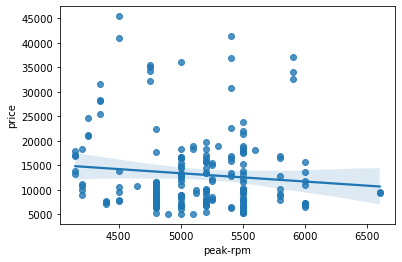

In [44]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show() ## vẽ để nhìn bằng mắt cảm quan xem mô hình có tốt hay ko ## chỉ vẽ được 1 biến còn cho mô hình 2 hay 3 biến thì ko vẽ đc
## với nhiều biến có thể plot distribution ## code update trên LMS sau

<p>Comparing the regression plot of "peak-rpm" and "highway-L/100km" we see that the points for "highway-L/100km" are much closer to the generated line and on the average increase. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>

<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise</h1>
    <b>Given the regression plots above is "peak-rpm" or "highway-L/100km" more strongly correlated with "price". Calculate correlation value to verify your answer.</b>
</div>

In [ ]:
# Start here


## 4.2. Residual Plot
A good way to visualize the variance of the data is to use a <b>residual plot</b>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

In [61]:
# Use google to find out how to show residual plot using Seaborn
# Show residual plot for second linear model (X: highway-L/100km - Y: price)


<p>What do we pay attention to when looking at a residual plot? We look at the spread of the residuals:</p>

<p>If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

<i>So what is above plot telling us ? </i>

## 4.3. Visualizing for Multiple Linear Regression

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First lets make a prediction 


In [ ]:
Y_hat = simple_lm.predict(X_4_feats)

In [ ]:
# Write code to show distribution plots for Y_hat and Y_true (price column)


<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise</h1>
    <b>Draw distribution plots to compare between Linear Regression (simple_lm) and Polynomial Regression (poly_lm)</b>
</div>

In [63]:
# Distribution plots for Linear Regression


In [ ]:
# Distribution plots for Polynomial Regression


#### Which model is better ?